In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv("D:/Python/Internship/Datasets/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [63]:
# Basic statistics
print("Unemployment Rate Statistics:")
print(unemployment_rate.describe())

Unemployment Rate Statistics:
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name:  Estimated Unemployment Rate (%), dtype: float64


In [64]:
# Data Cleaning
# Remove rows with missing values in key columns
df_clean = df.dropna(subset=['Region', ' Estimated Unemployment Rate (%)', ' Date'])

# Data Exploration
print("Unique Regions:", df_clean['Region'].unique())
print("\nDate Range:", df_clean[' Date'].max(), "to", df_clean[' Date'].min())

Unique Regions: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']

Date Range:  31-12-2019 to  29-02-2020


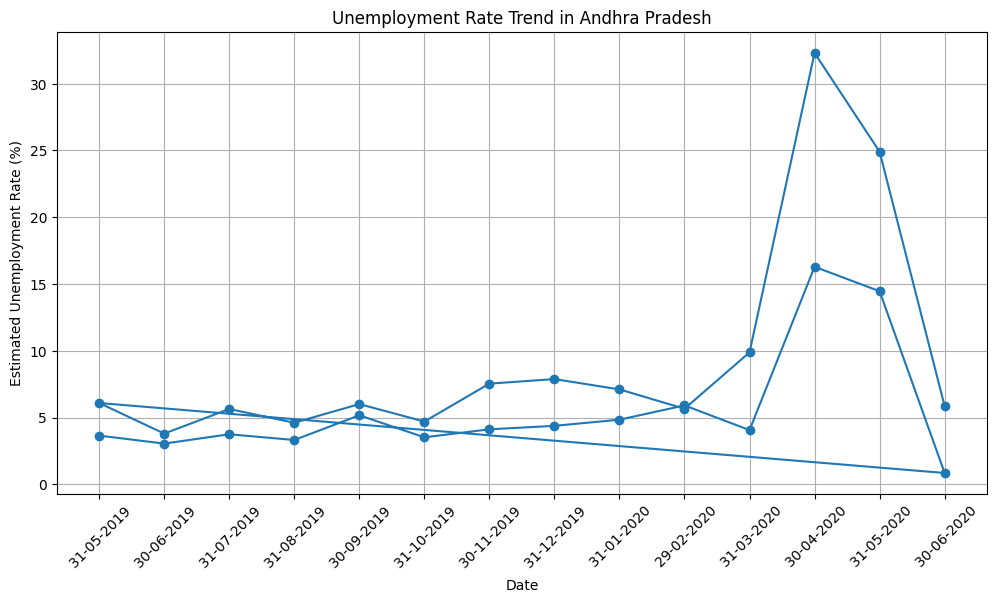

In [65]:
# Visualization: Unemployment trend over time for a sample region
sample_region = df_clean['Region'].dropna().unique()[0]
region_data = df_clean[df_clean['Region'] == sample_region]

plt.figure(figsize=(12, 6))
plt.plot(region_data[' Date'], region_data[' Estimated Unemployment Rate (%)'], marker='o', zorder=2)
plt.title(f'Unemployment Rate Trend in {sample_region}')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.show()

The unemployment rate trend in Andhra Pradesh shows significant fluctuations over the observed period. Notably, there is a sharp increase in the unemployment rate around April-May 2020, likely reflecting the impact of the COVID-19 pandemic and related lockdowns. After this peak, the unemployment rate gradually declines, indicating a recovery phase. Overall, the plot highlights both seasonal variations and the effect of external shocks on unemployment in the region.

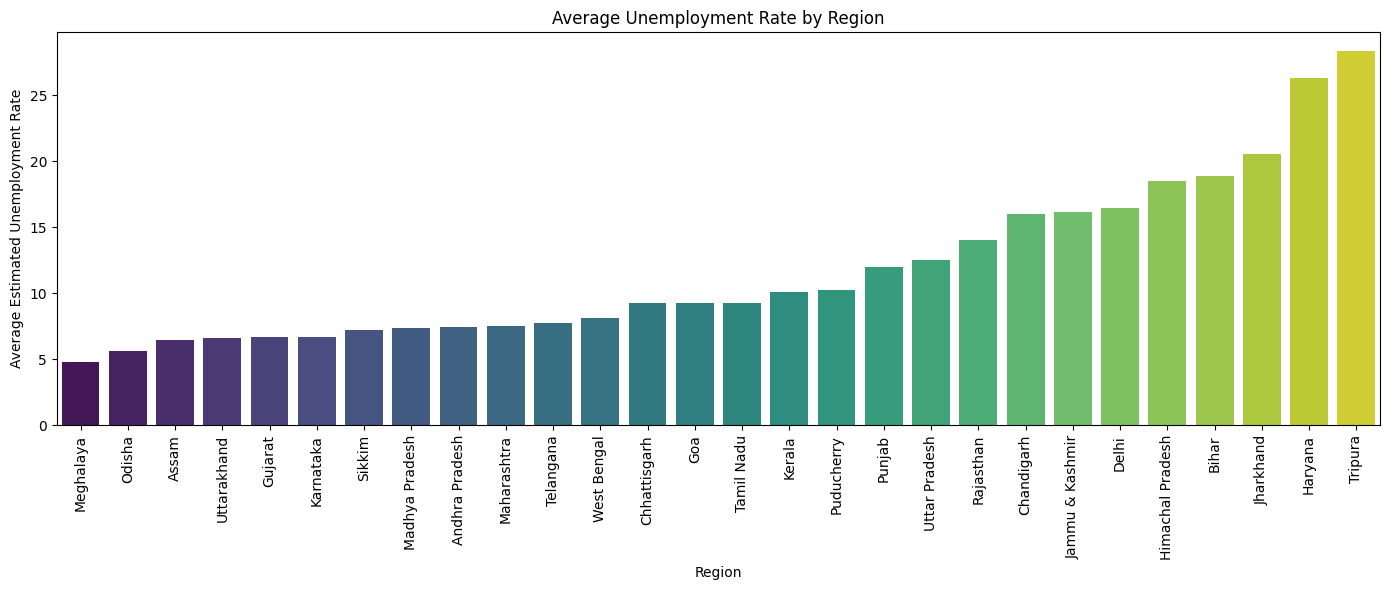

In [66]:
# Visualization: Average unemployment rate by region
plt.figure(figsize=(14, 6))
avg_unemployment = df_clean.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
sns.barplot(x=avg_unemployment.index, y=avg_unemployment.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate')
plt.tight_layout()
plt.show()

The barplot of average unemployment rates by region reveals significant regional disparities across India. States like Haryana and Tripura exhibit the highest average unemployment rates, while regions such as Meghalaya and Odisha have the lowest. This suggests that unemployment is a more severe issue in certain northern and northeastern states, whereas some eastern and southern regions fare better. The visualization highlights the need for region-specific policies to address unemployment challenges effectively.

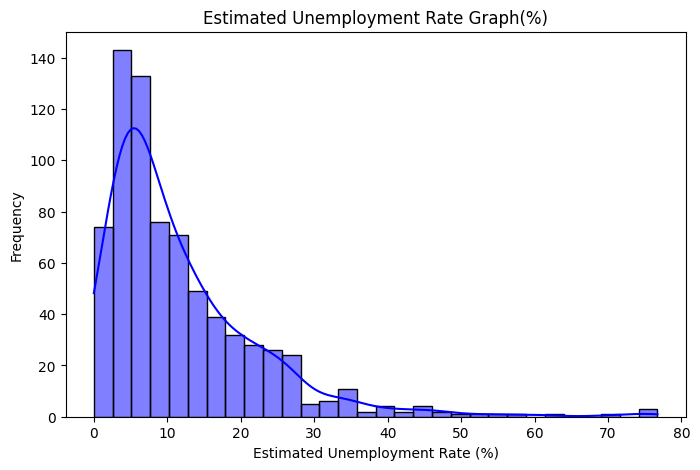

In [67]:
# Analyze the unemployment rate data
unemployment_rate = df[' Estimated Unemployment Rate (%)']

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.histplot(unemployment_rate, kde=True, bins=30, color='blue')
plt.title('Estimated Unemployment Rate Graph(%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

From the histogram, we can see that the unemployment rate is generally low, with a few spikes indicating higher unemployment periods. The distribution appears to be slightly skewed, suggesting that while most months have low unemployment rates, there are occasional months with significantly higher rates.

Average Unemployment Rate (Pre-Covid): 9.51%
Average Unemployment Rate (Covid Period): 17.77%


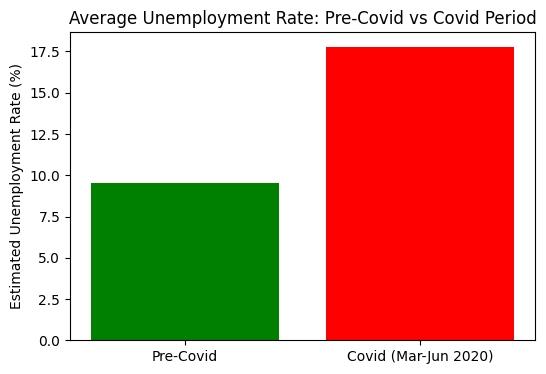

In [68]:
# Investigate the impact of Covid-19 on unemployment rates

# Convert ' Date' column to datetime for filtering
df_clean[' Date'] = pd.to_datetime(df_clean[' Date'], dayfirst=True)

# Define pre-Covid and Covid periods
pre_covid = df_clean[df_clean[' Date'] < '2020-03-01']
covid = df_clean[(df_clean[' Date'] >= '2020-03-01') & (df_clean[' Date'] <= '2020-06-30')]

# Calculate average unemployment rates for both periods
pre_covid_avg = pre_covid[' Estimated Unemployment Rate (%)'].mean()
covid_avg = covid[' Estimated Unemployment Rate (%)'].mean()

print(f"Average Unemployment Rate (Pre-Covid): {pre_covid_avg:.2f}%")
print(f"Average Unemployment Rate (Covid Period): {covid_avg:.2f}%")

# Visualize the change
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Covid', 'Covid (Mar-Jun 2020)'], [pre_covid_avg, covid_avg], color=['green', 'red'])
plt.title('Average Unemployment Rate: Pre-Covid vs Covid Period')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

The bar chart comparing average unemployment rates before and during the Covid period (March–June 2020) clearly shows a substantial increase in unemployment during the pandemic. The average unemployment rate rose from approximately 9.5% pre-Covid to about 17.8% during the Covid period. This sharp rise highlights the significant economic impact of the Covid-19 pandemic and associated lockdowns on employment across India.

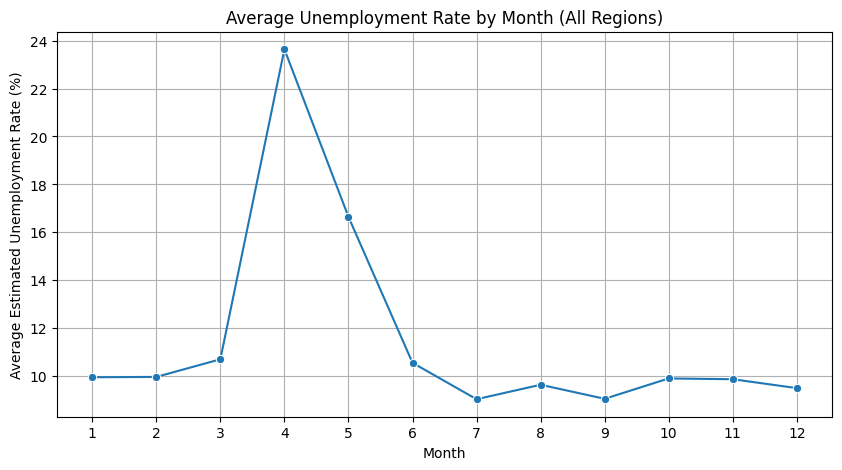

In [69]:
# Identify key patterns or seasonal trends in the unemployment data

# Group by month to analyze seasonality
df_clean['Month'] = df_clean[' Date'].dt.month
monthly_avg = df_clean.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Unemployment Rate by Month (All Regions)')
plt.xlabel('Month')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [70]:
# Print monthly averages for reference
print("Monthly Average Unemployment Rates:")
print(monthly_avg)

Monthly Average Unemployment Rates:
Month
1      9.950755
2      9.964717
3     10.700577
4     23.641569
5     16.646190
6     10.553462
7      9.033889
8      9.637925
9      9.051731
10     9.900909
11     9.868364
12     9.497358
Name:  Estimated Unemployment Rate (%), dtype: float64


The line plot of average unemployment rate by month across all regions reveals a clear seasonal pattern. There is a pronounced spike in unemployment rates during April and May, likely reflecting the impact of the nationwide Covid-19 lockdown in 2020. Outside of this period, unemployment rates remain relatively stable, with minor fluctuations throughout the year. This suggests that while unemployment in India generally follows a consistent monthly trend, extraordinary events such as the pandemic can cause significant short-term disruptions.

**Policy Insights from Unemployment Data Analysis:**

1. **Regional Disparities:**  
    The average unemployment rates by region (`avg_unemployment`) reveal significant disparities. States like Haryana and Tripura face much higher unemployment than states like Meghalaya and Odisha. This suggests the need for region-specific interventions, such as targeted job creation programs and skill development initiatives in high-unemployment regions.

2. **Impact of External Shocks:**  
    The sharp increase in unemployment during the Covid-19 period (`covid_avg` vs. `pre_covid_avg`) highlights the vulnerability of the labor market to external shocks. Policies should focus on building economic resilience, such as expanding social safety nets and supporting small businesses during crises.

3. **Seasonal Trends:**  
    The monthly analysis (`monthly_avg`) shows spikes in unemployment during certain months, especially during the Covid-19 lockdown. Understanding these patterns can help policymakers time employment schemes or public works programs to coincide with periods of higher unemployment.

4. **Urban-Rural Differences:**  
    The dataset includes both rural and urban areas. Policymakers should consider the unique challenges faced by each, such as rural underemployment or urban job losses during lockdowns, and design tailored interventions.

5. **Labour Participation:**  
    Variations in the estimated labour participation rate suggest that increasing workforce participation, especially among underrepresented groups, could be a lever for economic growth.

**Recommendations:**
- Implement regionally tailored employment and training programs.
- Strengthen social protection systems to cushion against economic shocks.
- Use seasonal insights to optimize the timing of government employment schemes.
- Address barriers to labour force participation, particularly for women and marginalized groups.